# K-Means Clustering: A Thorough Mathematical Explanation


### Fundamental Principles

1. **Clustering Objective**:
   - The goal of K-Means is to partition the data into $K$ clusters such that the total within-cluster sum of squares (WCSS) is minimized.
   - Each data point is assigned to the cluster with the nearest centroid.
   - Centroids are recalculated as the mean of the points in their respective clusters.

2. **Cluster Representation**:
   - Each cluster $j$ is represented by a centroid $\mathbf{\mu}_j$, which is the mean of the points assigned to that cluster.

### Assumptions

1. **Number of Clusters $K$**:
   - The number of clusters $K$ must be predefined before running the algorithm.
   - Choosing the right value of $K$ is crucial, typically determined using methods like the Elbow method or the Silhouette score.

2. **Euclidean Distance**:
   - K-Means uses Euclidean distance as the measure of similarity between data points.
   - This implies that K-Means assumes clusters are spherical and equally sized in all dimensions.

3. **Equal Importance**:
   - All features are treated equally, which can be problematic if they have different scales or variances. Therefore, data normalization or standardization is commonly performed before applying K-Means.

### Equations Involved

1. **Initialization**:
   - Choose $K$ initial centroids, often selected randomly from the data points:
     $$
     \mathbf{\mu}_1, \mathbf{\mu}_2, \dots, \mathbf{\mu}_K
     $$

2. **Assignment Step**:
   - Assign each data point $\mathbf{x}_i$ to the nearest centroid $\mathbf{\mu}_j$:
     $$
     c_i = \arg \min_{j} \|\mathbf{x}_i - \mathbf{\mu}_j\|^2
     $$
     where $c_i$ is the cluster assignment for the $i$-th data point, and $\|\mathbf{x}_i - \mathbf{\mu}_j\|^2$ is the squared Euclidean distance between $\mathbf{x}_i$ and $\mathbf{\mu}_j$.

3. **Update Step**:
   - Recalculate the centroid of each cluster as the mean of the points assigned to it:
     $$
     \mathbf{\mu}_j = \frac{1}{|C_j|} \sum_{\mathbf{x}_i \in C_j} \mathbf{x}_i
     $$
     where $C_j$ is the set of points assigned to cluster $j$ and $|C_j|$ is the number of points in cluster $j$.

4. **Objective Function**:
   - The algorithm iteratively minimizes the total within-cluster sum of squares (WCSS), also known as inertia:
     $$
     J = \sum_{j=1}^{K} \sum_{\mathbf{x}_i \in C_j} \|\mathbf{x}_i - \mathbf{\mu}_j\|^2
     $$
   - This objective function $J$ quantifies the compactness of the clusters. A smaller $J$ indicates tighter clusters with minimal intra-cluster variance.

### Learning from Data

1. **Initialization**:
   - Begin by initializing $K$ centroids. These centroids can be chosen randomly from the data points or by using more sophisticated methods like K-Means++, which improves the choice of initial centroids to speed up convergence.

2. **Iterative Optimization**:
   - **Assignment**: Each data point is assigned to the cluster with the nearest centroid.
   - **Update**: Centroids are recalculated as the mean of all points assigned to each cluster.
   - These two steps are repeated until the assignments no longer change or the changes are below a certain threshold (convergence), or a maximum number of iterations is reached.

3. **Convergence**:
   - The algorithm converges when the centroids stabilize, meaning there is no significant change in their positions after consecutive iterations.
   - Alternatively, convergence can be defined when the decrease in the objective function $J$ is smaller than a predefined tolerance level.

### Making Predictions

- **Assigning New Points**:
  - Once the clusters are formed, new data points can be assigned to clusters by calculating their distance to each of the $K$ centroids and choosing the nearest one:
    $$
    \text{Assignment of new point } \mathbf{x} = \arg \min_{j} \|\mathbf{x} - \mathbf{\mu}_j\|^2
    $$


# Function to load data from a CSV file

In [1]:
import numpy as np
import csv
import random
import math
from collections import defaultdict
import os
os.environ['OMP_NUM_THREADS'] = '4'           # Setting environment variable to avoid memory leak warning

def load_data(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)
        data = [[float(x) for x in row] for row in reader]
    return data


# Function to preprocess data

In [2]:
def preprocess_data(data):
    X = np.array([row[:-1] for row in data])
    y = np.array([row[-1] for row in data])
    return X, y


# K-Means Clustering Class

### Explanation of `KMeans` Class Functions

#### `initialize_centroids` Function
$$
\text{initialize_centroids}(X)
$$
- **Purpose**: Selects initial centroids randomly from the dataset `X`.
- **Explanation**: Randomly samples `k` data points from `X` to serve as the initial centroids. This ensures that the algorithm starts with diverse centroid positions across the data space.

#### `assign_clusters` Function
$$
\text{assign_clusters}(X, centroids)
$$
- **Purpose**: Assigns each data point in `X` to its nearest centroid based on Euclidean distance.
- **Explanation**: Calculates the Euclidean distance between each data point `x` in `X` and all centroids. Each data point is assigned to the cluster whose centroid is closest to it in terms of Euclidean distance.

#### `calculate_centroids` Function
$$
\text{calculate_centroids}(clusters)
$$
- **Purpose**: Computes new centroids by averaging the positions of all data points assigned to each cluster.
- **Explanation**: For each cluster, computes a new centroid by taking the mean of all data points assigned to that cluster. This update step moves each centroid to the center (mean position) of its respective cluster.

#### `euclidean_distance` Function
$$
\text{euclidean_distance}(x1, x2)
$$
- **Purpose**: Computes the Euclidean distance between two data points `x1` and `x2`.
- **Explanation**: Calculates the Euclidean distance using the formula:
  $$
  \sqrt{\sum_{i=1}^{n} (x1_i - x2_i)^2}
  $$
  where $ x1_i $ and $ x2_i $ are the coordinates of the data points `x1` and `x2`, respectively, in the \( i \)-th dimension.

#### `fit` Function
$$
\text{fit}(X)
$$
- **Purpose**: Fits the KMeans model to the data `X` by iteratively updating centroids until convergence or reaching the maximum number of iterations.
- **Explanation**: Initializes centroids, then iteratively assigns data points to clusters and updates centroids based on cluster assignments. Stops when centroids no longer change significantly between iterations or after reaching `max_iterations`.

#### `has_converged` Function
$$
\text{has_converged}(old\_centroids, new\_centroids)
$$
- **Purpose**: Checks if the centroids have converged (stopped changing significantly) between consecutive iterations.
- **Explanation**: Computes the Euclidean distance between corresponding old and new centroids. If the sum of these distances is zero, the centroids are considered converged.

#### `predict` Function
$$
\text{predict}(X)
$$
- **Purpose**: Predicts the cluster labels for new data `X` based on the trained centroids.
- **Explanation**: For each data point `x` in `X`, computes distances to all centroids and assigns `x` to the cluster associated with the nearest centroid. Returns a list of cluster labels for each data point in `X`.



In [3]:
class KMeans:
    def __init__(self, k=3, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations

    def initialize_centroids(self, X):
        indices = random.sample(range(X.shape[0]), self.k)
        centroids = X[indices]
        return centroids

    def assign_clusters(self, X, centroids):
        clusters = [[] for _ in range(self.k)]
        for x in X:
            distances = [self.euclidean_distance(x, centroid) for centroid in centroids]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(x)
        return clusters

    def calculate_centroids(self, clusters):
        centroids = []
        for cluster in clusters:
            centroid = np.mean(cluster, axis=0) if cluster else [0] * len(clusters[0][0])
            centroids.append(centroid)
        return centroids

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def fit(self, X):
        centroids = self.initialize_centroids(X)
        for _ in range(self.max_iterations):
            clusters = self.assign_clusters(X, centroids)
            previous_centroids = centroids
            centroids = self.calculate_centroids(clusters)
            if self.has_converged(previous_centroids, centroids):
                break
        self.centroids = centroids

    def has_converged(self, old_centroids, new_centroids):
        distances = [self.euclidean_distance(old, new) for old, new in zip(old_centroids, new_centroids)]
        return sum(distances) == 0

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self.euclidean_distance(x, centroid) for centroid in self.centroids]
            cluster_index = distances.index(min(distances))
            predictions.append(cluster_index)
        return predictions

# For accuracy calculation

In [4]:
# def accuracy(y_true, y_pred):
#     label_mapping = defaultdict(list)
#     for true, pred in zip(y_true, y_pred):
#         label_mapping[pred].append(true)
    
#     label_mapping = {
#         k: max(set(v), key=v.count) if v else None 
#         for k, v in label_mapping.items()
#     }
#     mapped_predictions = [label_mapping[pred] if pred in label_mapping else None for pred in y_pred]
    
#     valid_indices = [i for i in range(len(mapped_predictions)) if mapped_predictions[i] is not None]
#     y_true_filtered = [y_true[i] for i in valid_indices]
#     mapped_predictions_filtered = [mapped_predictions[i] for i in valid_indices]
    
#     correct = sum(yt == yp for yt, yp in zip(y_true_filtered, mapped_predictions_filtered))
#     return correct / len(y_true_filtered)



### Explanation of `map_labels` Function

#### Purpose:
The `map_labels` function evaluates the accuracy of predicted labels (`y_pred`) by mapping each predicted label to its most frequent corresponding true label and computing the accuracy based on these mappings.

#### Steps:

1. **Label Mapping Initialization**:
   - The function starts by initializing a `defaultdict` (`label_mapping`) to store mappings from predicted labels to lists of corresponding true labels. This is done by iterating through pairs of true labels (`y_true`) and predicted labels (`y_pred`). For each pair, it appends the true label (`true`) to the list associated with the predicted label (`pred`) in `label_mapping`.

2. **Determining Most Frequent True Label**:
   - Once `label_mapping` is populated, the function transforms it into a regular dictionary (`label_mapping`) where each predicted label (`k`) is mapped to the most frequently occurring true label (`max(set(v), key=v.count)`). This step ensures that each predicted label is associated with the true label that occurs most frequently among its corresponding true labels.

3. **Mapping Predictions**:
   - With `label_mapping` established, the function then maps each predicted label in `y_pred` to its corresponding most frequent true label. It creates a new list (`mapped_predictions`) where each element corresponds to the most frequent true label for the corresponding predicted label in `y_pred`.

4. **Filtering Valid Predictions**:
   - To compute accuracy accurately, the function filters out predictions (`mapped_predictions`) where no valid true label mapping exists. It creates `valid_indices`, a list of indices where `mapped_predictions` is not `None`, ensuring that only valid predictions are considered in the accuracy calculation.

5. **Calculating Accuracy**:
   - Using the filtered lists (`y_true_filtered` and `mapped_predictions_filtered`), the function calculates the accuracy by comparing each element of `y_true_filtered` with the corresponding element of `mapped_predictions_filtered`. It counts the number of correct predictions and divides by the total number of valid predictions (`len(y_true_filtered)`).



In [9]:
def map_labels(y_true, y_pred):
    label_mapping = defaultdict(list)
    for true, pred in zip(y_true, y_pred):
        label_mapping[pred].append(true)
    
    label_mapping = {
        k: max(set(v), key=v.count) if v else None 
        for k, v in label_mapping.items()
    }
    mapped_predictions = [label_mapping[pred] if pred in label_mapping else None for pred in y_pred]
    
    valid_indices = [i for i in range(len(mapped_predictions)) if mapped_predictions[i] is not None]
    y_true_filtered = [y_true[i] for i in valid_indices]
    mapped_predictions_filtered = [mapped_predictions[i] for i in valid_indices]
    
    correct = sum(yt == yp for yt, yp in zip(y_true_filtered, mapped_predictions_filtered))
    return correct / len(y_true_filtered)


def evaluate_custom_kmeans(X_train, y_train, X_test, y_test):
    custom_kmeans_model = KMeans(k=3, max_iterations=100)
    custom_kmeans_model.fit(X_train)
    y_train_pred_custom = custom_kmeans_model.predict(X_train)
    y_test_pred_custom = custom_kmeans_model.predict(X_test)

    train_accuracy_custom = map_labels(y_train, y_train_pred_custom)
    test_accuracy_custom = map_labels(y_test, y_test_pred_custom)

    print(f"Custom KMeans - Training Accuracy: {train_accuracy_custom * 100:.2f}%")
    print(f"Custom KMeans - Test Accuracy: {test_accuracy_custom * 100:.2f}%")

train_data = load_data('data1_train.csv')                               # Load and preprocess the first dataset
test_data = load_data('data1_test.csv')
X_train1, y_train1 = preprocess_data(train_data)
X_test1, y_test1 = preprocess_data(test_data)


train_data2 = load_data('data2_train.csv')                              # Load and preprocess the second dataset
test_data2 = load_data('data2_test.csv')
X_train2, y_train2 = preprocess_data(train_data2)
X_test2, y_test2 = preprocess_data(test_data2)


print("Results for data1:")                                            # Evaluate on the first dataset
evaluate_custom_kmeans(X_train1, y_train1, X_test1, y_test1)



print("\nResults for data2:")                                             # Evaluate on the second dataset
evaluate_custom_kmeans(X_train2, y_train2, X_test2, y_test2)

Results for data1:
Custom KMeans - Training Accuracy: 97.38%
Custom KMeans - Test Accuracy: 97.50%

Results for data2:
Custom KMeans - Training Accuracy: 0.38%
Custom KMeans - Test Accuracy: 0.00%


# Hyperparameter Tuning


#### 1. **Hyperparameter Tuning Function (`hyperparameter_tuning`)**

- **Purpose**: This function evaluates different values of the hyperparameter `k` (number of clusters) for KMeans clustering.

- **Steps**:
  - **Iterate over `k` values**: It iterates through each value of `k` from 2 to `max_k` (inclusive).
  - **Fit KMeans model**: For each `k`, it initializes a KMeans model (`model`) with `k` clusters and fits it to the training data (`X_train`).
  - **Assign clusters**: It assigns data points in `X_train` to clusters based on the centroids obtained from the KMeans model.
  - **Calculate WCSS**: It computes the Within-Cluster Sum of Squares (WCSS) using the `calculate_wcss` function, which measures the compactness of clusters.
  - **Compute Silhouette Score**: It computes the Silhouette score using `silhouette_score`, which measures the quality of clusters by assessing how similar each data point is to its own cluster compared to other clusters.
  - **Store results**: WCSS and Silhouette scores for each `k` value are appended to `wcss_values` and `silhouette_scores` lists, respectively.

#### 2. **Evaluation Function (`evaluate_hyperparameter`)**

- **Purpose**: This function manages the evaluation of hyperparameters and visualizes the results using plots.

- **Steps**:
  - **Call `hyperparameter_tuning`**: It calls `hyperparameter_tuning` to obtain WCSS and Silhouette scores for different values of `k`.
  - **Plot WCSS (`Elbow Method`)**: It plots the Elbow Method graph using `matplotlib.pyplot` to visualize how WCSS changes with varying `k`. The goal is to identify the `k` value where the decrease in WCSS starts to flatten out (elbow point), indicating the optimal number of clusters.
  - **Plot Silhouette Scores**: It plots Silhouette scores against different `k` values to assess the quality of clusters. Higher Silhouette scores indicate better-defined clusters.

#### 3. **Data Loading and Preprocessing**

- **Purpose**: Before hyperparameter tuning, the code loads and preprocesses two datasets (`data1` and `data2`).

- **Steps**:
  - **Load and preprocess data**: Each dataset (`data1` and `data2`) is loaded and preprocessed using `load_data` and `preprocess_data` functions to prepare them for clustering.

#### 4. **Execution and Reporting**

- **Purpose**: After defining functions and preprocessing data, the code evaluates KMeans clustering on both datasets (`data1` and `data2`).

- **Steps**:
  - **Evaluate on `data1`**: It calls `evaluate_hyperparameter` for `data1`, which includes hyperparameter tuning, plotting WCSS and Silhouette scores.
  - **Evaluate on `data2`**: Similarly, it calls `evaluate_hyperparameter` for `data2`, performing the same hyperparameter tuning and evaluation process.


Results for data1:
K: 2, WCSS: 90304.58533389075, Silhouette Score: 0.318554105787359
K: 3, WCSS: 40418.28256408309, Silhouette Score: 0.48848041348415167
K: 4, WCSS: 37308.35142473884, Silhouette Score: 0.3947933836440322
K: 5, WCSS: 34141.37327150523, Silhouette Score: 0.3010827529123478
K: 6, WCSS: 30544.983480346473, Silhouette Score: 0.22386550118364013
K: 7, WCSS: 28131.292442705166, Silhouette Score: 0.2339097895752723
K: 8, WCSS: 26905.48798498988, Silhouette Score: 0.2295898290149972
K: 9, WCSS: 24567.641294224795, Silhouette Score: 0.22543503176696456
K: 10, WCSS: 23396.364413569663, Silhouette Score: 0.2211457537989021


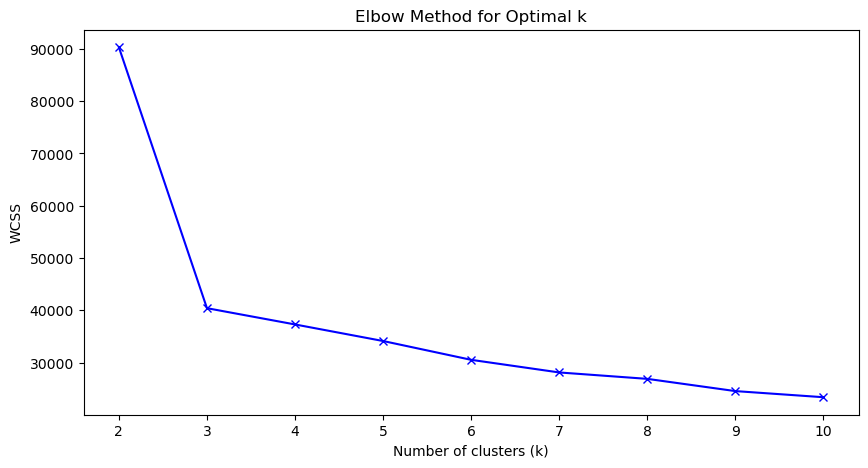

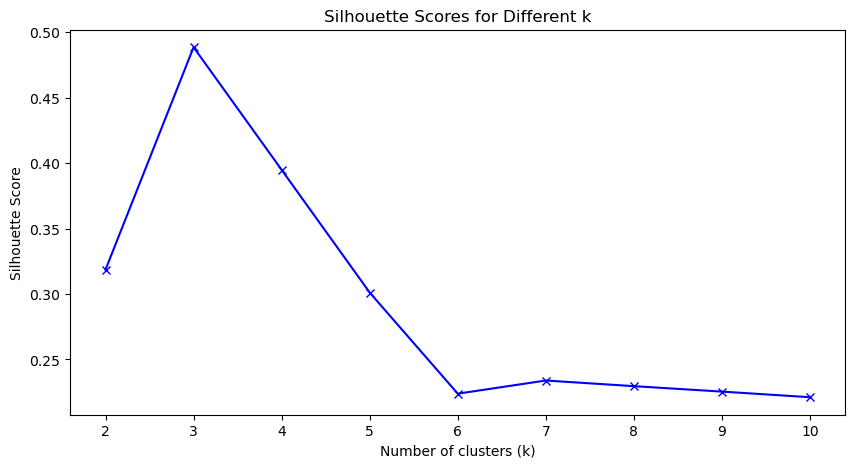


Results for data2:
K: 2, WCSS: 189218.84040042278, Silhouette Score: 0.6101407799042824
K: 3, WCSS: 159980.3257115127, Silhouette Score: 0.43729658316978404
K: 4, WCSS: 126108.23917997946, Silhouette Score: 0.382469400049956
K: 5, WCSS: 102001.56490803811, Silhouette Score: 0.333385781648942
K: 6, WCSS: 99348.94415297624, Silhouette Score: 0.2976816784797387
K: 7, WCSS: 73254.80368783012, Silhouette Score: 0.3337295138284127
K: 8, WCSS: 66374.92518784567, Silhouette Score: 0.32165204460388397
K: 9, WCSS: 58865.60369162485, Silhouette Score: 0.32399833241035886
K: 10, WCSS: 54010.860637898964, Silhouette Score: 0.3295468302277047


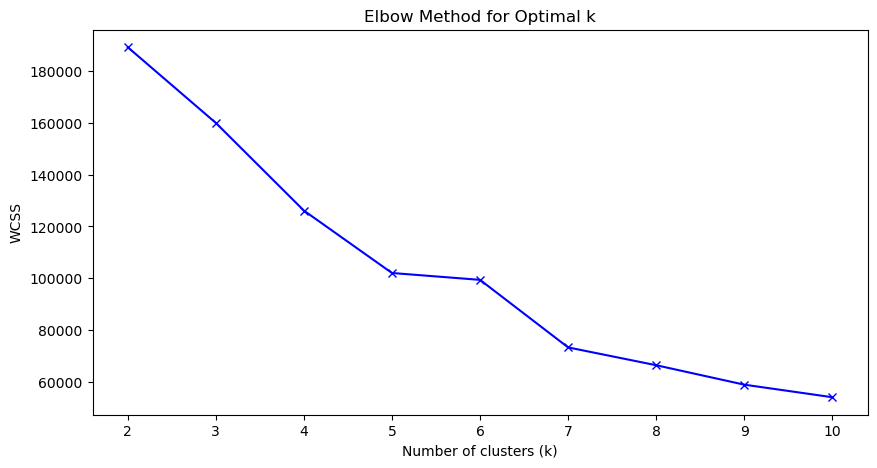

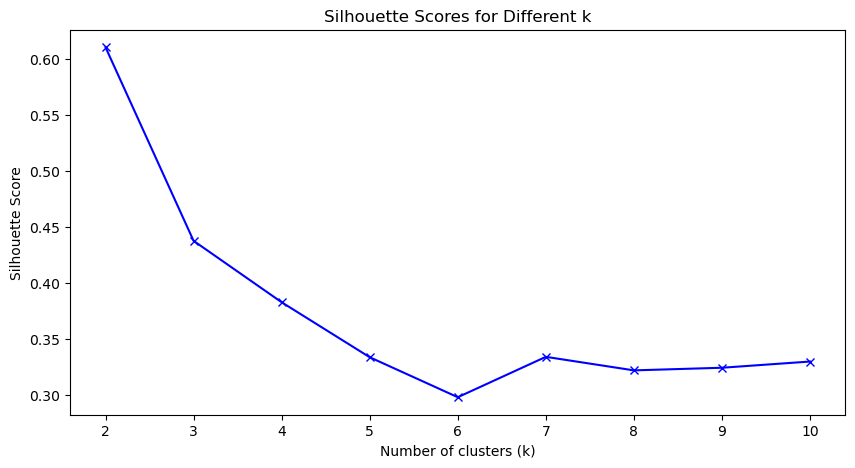

In [6]:
from collections import defaultdict
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


def calculate_wcss(X, clusters, centroids):
    wcss = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            wcss += sum((a - b) ** 2 for a, b in zip(point, centroids[i]))
    return wcss

def hyperparameter_tuning(X, max_k):
    wcss_values = []
    silhouette_scores = []

    for k in range(2, max_k + 1):
        model = KMeans(k=k, max_iterations=100)
        model.fit(X)
        clusters = model.assign_clusters(X, model.centroids)
        wcss = calculate_wcss(X, clusters, model.centroids)
        wcss_values.append(wcss)
        
        y_pred = model.predict(X)
        silhouette_avg = silhouette_score(X, y_pred)
        silhouette_scores.append(silhouette_avg)
        
        print(f"K: {k}, WCSS: {wcss}, Silhouette Score: {silhouette_avg}")

    return wcss_values, silhouette_scores


def evaluate_hyperparameter(X_train, y_train, X_test, y_test):
    max_k = 10
    wcss_values, silhouette_scores = hyperparameter_tuning(X_train, max_k)
    # --------------------------------------------------------
    plt.figure(figsize=(10, 5))                                               # Plotting Elbow Method
    plt.plot(range(2, max_k + 1), wcss_values, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Optimal k')
    plt.show()
    # --------------------------------------------------------
    plt.figure(figsize=(10, 5))                                               # Plotting Silhouette Scores
    plt.plot(range(2, max_k + 1), silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different k')
    plt.show()


train_data = load_data('data1_train.csv')                               # Load and preprocess the first dataset
test_data = load_data('data1_test.csv')
X_train1, y_train1 = preprocess_data(train_data)
X_test1, y_test1 = preprocess_data(test_data)


train_data2 = load_data('data2_train.csv')                              # Load and preprocess the second dataset
test_data2 = load_data('data2_test.csv')
X_train2, y_train2 = preprocess_data(train_data2)
X_test2, y_test2 = preprocess_data(test_data2)


print("Results for data1:")                                            # Evaluate on the first dataset
evaluate_hyperparameter(X_train1, y_train1, X_test1, y_test1)



print("\nResults for data2:")                                             # Evaluate on the second dataset
evaluate_hyperparameter(X_train2, y_train2, X_test2, y_test2)



# sklearn comparison

### `evaluate_kmeans` Function Explanation

The `evaluate_kmeans` function is used to train and evaluate a K-Means clustering model on given training and test datasets. Here's how it operates:

1. **Model Initialization**:
   - **KMeans from scikit-learn**: The function begins by initializing a K-Means clustering model from scikit-learn (`SKLearnKMeans`). The parameters specified are:
     - `n_clusters=3`: The number of clusters to form and the number of centroids to generate.
     - `max_iter=100`: The maximum number of iterations for a single run.
     - `n_init=10`: The number of times the K-Means algorithm will be run with different centroid seeds. The final result is the best output from these `n_init` runs.
     - `random_state=42`: A seed used to initialize the pseudo-random number generator, ensuring reproducibility of the results.

2. **Model Training**:
   - The K-Means model is trained on the training data (`X_train`). During training, the algorithm partitions the data into `n_clusters` clusters by iteratively refining the cluster centers (centroids).

3. **Prediction**:
   - After training, the model predicts the cluster labels for both the training and test datasets. These predicted labels represent the closest centroid for each data point.

4. **Label Mapping and Evaluation**:
   - **Label Mapping**: Since K-Means clustering is an unsupervised learning method, the predicted cluster labels are arbitrary. Therefore, the function uses a mapping strategy (`map_labels`) to align the predicted cluster labels with the actual class labels in the data.
   - **Accuracy Calculation**: The function calculates the accuracy of the predicted labels compared to the true labels. This involves matching the predicted clusters to the true classes as accurately as possible:
     $$
     \text{Accuracy} = \frac{\text{Number of Correctly Mapped Predictions}}{\text{Total Number of Predictions}}
     $$
   - The function prints the training and test accuracies after mapping.



In [7]:
from sklearn.cluster import KMeans as SKLearnKMeans
from sklearn.metrics import accuracy_score

train_data1 = load_data('data1_train.csv')                   # Load and preprocess the first dataset
test_data1 = load_data('data1_test.csv')
X_train1, y_train1 = preprocess_data(train_data1)
X_test1, y_test1 = preprocess_data(test_data1)


train_data2 = load_data('data2_train.csv')                   # Load and preprocess the second dataset
test_data2 = load_data('data2_test.csv')
X_train2, y_train2 = preprocess_data(train_data2)
X_test2, y_test2 = preprocess_data(test_data2)


def evaluate_kmeans(X_train, y_train, X_test, y_test):
    
    sklearn_kmeans_model = SKLearnKMeans(n_clusters=3, max_iter=100, n_init=10, random_state=42)
    sklearn_kmeans_model.fit(X_train)
    y_train_pred_sklearn = sklearn_kmeans_model.predict(X_train)
    y_test_pred_sklearn = sklearn_kmeans_model.predict(X_test)

    
    train_accuracy_sklearn = map_labels(y_train, y_train_pred_sklearn)   # Calculate accuracy for scikit-learn model
    test_accuracy_sklearn = map_labels(y_test, y_test_pred_sklearn)

    print(f"Scikit-learn KMeans - Training Accuracy: {train_accuracy_sklearn * 100:.2f}%")
    print(f"Scikit-learn KMeans - Test Accuracy: {test_accuracy_sklearn * 100:.2f}%")


print("Results for data1:")                    # Evaluate on the first dataset
evaluate_kmeans(X_train1, y_train1, X_test1, y_test1)


print("\nResults for data2:")                  # Evaluate on the second dataset
evaluate_kmeans(X_train2, y_train2, X_test2, y_test2)


Results for data1:
Scikit-learn KMeans - Training Accuracy: 97.38%
Scikit-learn KMeans - Test Accuracy: 97.50%

Results for data2:
Scikit-learn KMeans - Training Accuracy: 97.25%
Scikit-learn KMeans - Test Accuracy: 97.50%


In [8]:
class Employee:
    def __init__ (self,name):
        self.name=name
#         number=77
    def cout (self):
#         number=79
        print(f"My name is {self.name} and rank is {self.number}" );

name=Employee("Aditya")
name.number=111
name.cout()

My name is Aditya and rank is 111
